In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel(r"C:\Users\Seema Chauhan\Downloads\data for research papers\Data_2.xlsx")
# data = pd.read_csv(r"C:\Users\Seema Chauhan\Downloads\data for research papers\Ranichauri_2014-17_evapo.csv")

In [3]:
data.head()

,Unnamed: 0,Tmax,Tmin,Rh1,W,E
0,1,16.8,7.7,92,2.8,0.8
1,2,22.7,6.6,92,3.5,1.7
2,3,22.0,9.1,90,5.0,1.5
3,4,21.4,9.1,92,4.9,1.4
4,5,20.1,6.6,93,3.3,1.4


In [5]:
# data.drop(["Unnamed: 8","Unnamed: 7","Unnamed: 6","Total"], axis = 1, inplace = True)
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
data.head()

,Tmax,Tmin,Rh1,W,E
0,16.8,7.7,92,2.8,0.8
1,22.7,6.6,92,3.5,1.7
2,22.0,9.1,90,5.0,1.5
3,21.4,9.1,92,4.9,1.4
4,20.1,6.6,93,3.3,1.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tmax    208 non-null    float64
 1   Tmin    208 non-null    float64
 2   Rh1     208 non-null    int64  
 3   W       208 non-null    float64
 4   E       208 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 8.2 KB


In [8]:
data.describe()

,Tmax,Tmin,Rh1,W,E
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,30.182212,17.160577,83.514423,5.236058,4.624038
std,6.272386,7.326794,10.951795,2.327757,2.996778
min,12.400000,3.700000,47.000000,1.700000,0.500000
25%,25.975000,10.025000,81.000000,3.300000,2.300000
50%,31.550000,17.650000,88.000000,5.000000,3.800000
75%,34.150000,24.400000,91.000000,6.900000,6.000000
max,42.400000,27.800000,97.000000,12.400000,14.000000


In [9]:
from pycaret.regression import*

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data.rename(columns = {'E' : 'EVAP'}, inplace = True)

In [12]:
data.head()

,Tmax,Tmin,Rh1,W,EVAP
0,16.8,7.7,92,2.8,0.8
1,22.7,6.6,92,3.5,1.7
2,22.0,9.1,90,5.0,1.5
3,21.4,9.1,92,4.9,1.4
4,20.1,6.6,93,3.3,1.4


In [13]:
train_data, test_data = train_test_split(data, test_size = 0.20, shuffle = False,random_state = 10)

In [14]:
train_data.shape

(166, 5)

In [15]:
train_data.head()

,Tmax,Tmin,Rh1,W,EVAP
0,16.8,7.7,92,2.8,0.8
1,22.7,6.6,92,3.5,1.7
2,22.0,9.1,90,5.0,1.5
3,21.4,9.1,92,4.9,1.4
4,20.1,6.6,93,3.3,1.4


In [16]:
test_data.head()

,Tmax,Tmin,Rh1,W,EVAP
166,27.5,11.0,90,3.4,4.0
167,30.4,13.5,88,5.0,5.0
168,32.9,15.5,88,5.3,5.7
169,35.7,18.7,77,3.1,6.0
170,32.1,17.7,83,5.9,6.0


In [17]:
test_data.shape

(42, 5)

In [18]:
y_train = train_data["EVAP"]

In [19]:
y_train.shape

(166,)

In [20]:
y_test = test_data["EVAP"]

In [21]:
x_train = train_data.drop('EVAP',axis = 1)
x_test = test_data.drop('EVAP',axis = 1)

In [22]:
test_data.head()

,Tmax,Tmin,Rh1,W,EVAP
166,27.5,11.0,90,3.4,4.0
167,30.4,13.5,88,5.0,5.0
168,32.9,15.5,88,5.3,5.7
169,35.7,18.7,77,3.1,6.0
170,32.1,17.7,83,5.9,6.0


In [23]:
train_data.head()

,Tmax,Tmin,Rh1,W,EVAP
0,16.8,7.7,92,2.8,0.8
1,22.7,6.6,92,3.5,1.7
2,22.0,9.1,90,5.0,1.5
3,21.4,9.1,92,4.9,1.4
4,20.1,6.6,93,3.3,1.4


In [24]:
reg = setup(data = data, train_size = 0.80,data_split_shuffle = False, target = "EVAP", session_id =112)

,Description,Value
0,session_id,112
1,Target,EVAP
2,Original Data,"(208, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(166, 4)"


In [25]:
check_model = compare_models(fold = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.5041,0.4232,0.6369,0.9231,0.1426,0.1728,0.0225
ridge,Ridge Regression,0.5037,0.4226,0.6367,0.9228,0.1435,0.1735,0.0225
lr,Linear Regression,0.5037,0.4225,0.6367,0.9227,0.1436,0.1736,1.7175
lar,Least Angle Regression,0.5037,0.4225,0.6367,0.9227,0.1436,0.1736,0.0250
huber,Huber Regressor,0.4974,0.4322,0.6411,0.9213,0.1408,0.1634,0.0375
et,Extra Trees Regressor,0.4605,0.4054,0.6229,0.9181,0.1244,0.1390,0.1875
catboost,CatBoost Regressor,0.4938,0.4650,0.6676,0.9156,0.1293,0.1406,0.7900
rf,Random Forest Regressor,0.4932,0.4642,0.6710,0.9056,0.1332,0.1488,0.2175
en,Elastic Net,0.5862,0.5979,0.7479,0.9023,0.1463,0.1679,0.0250
lightgbm,Light Gradient Boosting Machine,0.5729,0.5585,0.7370,0.8996,0.1520,0.1840,0.5675


In [26]:
reg1 = setup(data = data, train_size = 0.80, target = 'EVAP',session_id = 117,normalize = True,normalize_method = 'robust', log_experiment = True, transformation  =True,
            remove_perfect_collinearity= False,experiment_name = 'ins1')

,Description,Value
0,session_id,117
1,Target,EVAP
2,Original Data,"(208, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(166, 4)"


In [27]:
compare_models(fold = 4)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5829,0.5647,0.7473,0.9350,0.1421,0.1552,0.1900
catboost,CatBoost Regressor,0.5819,0.6121,0.7755,0.9297,0.1433,0.1508,0.7475
rf,Random Forest Regressor,0.6005,0.6159,0.7773,0.9295,0.1436,0.1595,0.2150
lr,Linear Regression,0.6362,0.6650,0.8124,0.9227,0.1753,0.2026,0.0225
ridge,Ridge Regression,0.6387,0.6650,0.8130,0.9227,0.1735,0.2021,0.0250
lar,Least Angle Regression,0.6362,0.6650,0.8124,0.9227,0.1753,0.2026,0.0250
br,Bayesian Ridge,0.6373,0.6650,0.8126,0.9227,0.1745,0.2025,0.0275
gbr,Gradient Boosting Regressor,0.6216,0.6805,0.8147,0.9223,0.1482,0.1619,0.0525
huber,Huber Regressor,0.6353,0.6898,0.8259,0.9198,0.1753,0.1980,0.0275
knn,K Neighbors Regressor,0.6239,0.6982,0.8180,0.9194,0.1586,0.1666,0.0325


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=117, verbose=0, warm_start=False)

In [29]:
huber = create_model("huber")
et = create_model("et", fold = 5)
br = create_model('br', fold = 5)
catboost = create_model('catboost', fold = 5)

xgboost = create_model('xgboost', fold = 5)
lightgbm = create_model('lightgbm',fold = 5)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4945,0.4881,0.6986,0.9264,0.1437,0.1556
1,0.5812,0.6592,0.8119,0.9324,0.1468,0.1332
2,0.6157,0.6430,0.8019,0.9071,0.1623,0.2097
3,0.7190,0.9993,0.9996,0.9057,0.1738,0.2077
4,0.8311,1.0931,1.0455,0.8683,0.1830,0.1915
Mean,0.6483,0.7765,0.8715,0.9080,0.1619,0.1795
SD,0.1163,0.2301,0.1304,0.0225,0.0151,0.0302


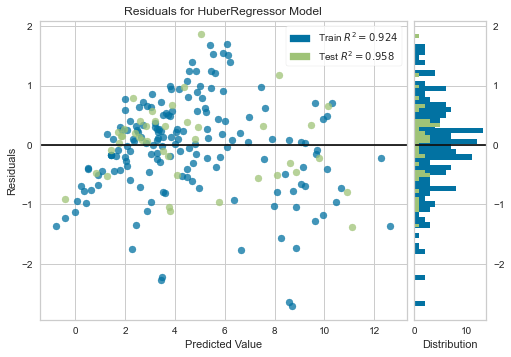

In [30]:
plot_model(huber)

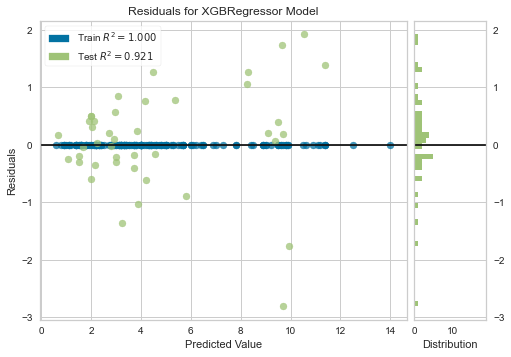

In [31]:
plot_model(xgboost)

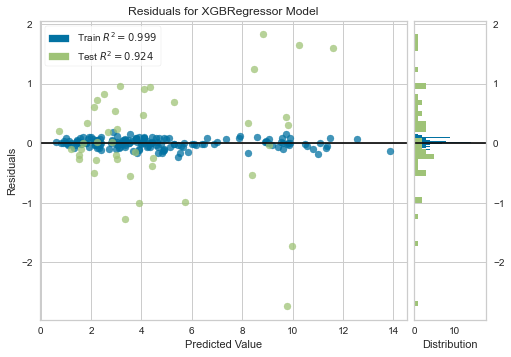

In [32]:
tune_xgboost= tune_model(xgboost,n_iter = 15, optimize = "MAE")
plot_model(tune_xgboost)

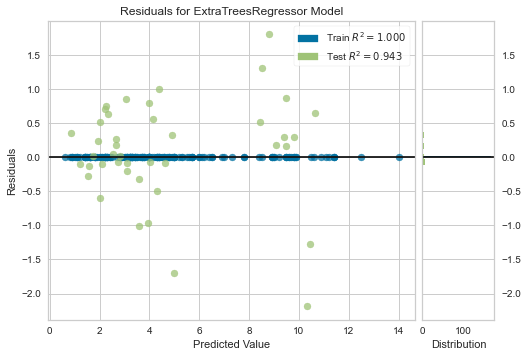

In [33]:
plot_model(et)

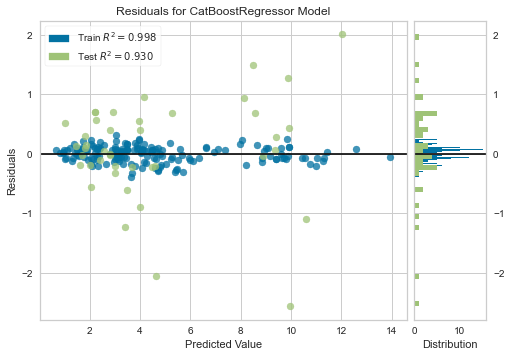

In [34]:
plot_model(catboost)

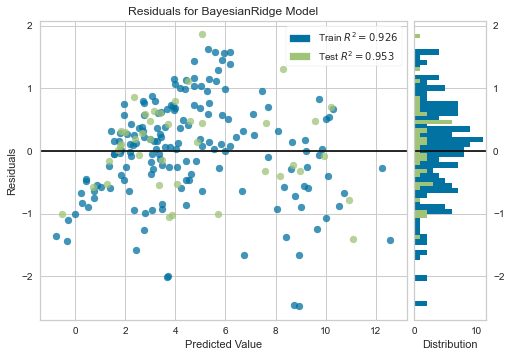

In [35]:
plot_model(br)

In [36]:
tune_et= tune_model(et,n_iter = 10, optimize = "MAE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4858,0.3888,0.6235,0.9319,0.1328,0.1678
1,0.6229,0.5717,0.7561,0.9232,0.1704,0.1928
2,0.8063,0.9983,0.9991,0.8781,0.1463,0.1332
3,0.3283,0.1759,0.4194,0.9723,0.1215,0.1504
4,0.4938,0.3707,0.6089,0.9486,0.1636,0.2440
5,0.5400,0.3615,0.6013,0.9512,0.1467,0.1976
6,0.8072,1.3273,1.1521,0.8695,0.1868,0.1795
7,0.3973,0.2378,0.4876,0.9754,0.1159,0.1387
8,0.7015,0.7316,0.8553,0.9367,0.1574,0.1788
9,0.7225,0.7247,0.8513,0.8682,0.1562,0.1787


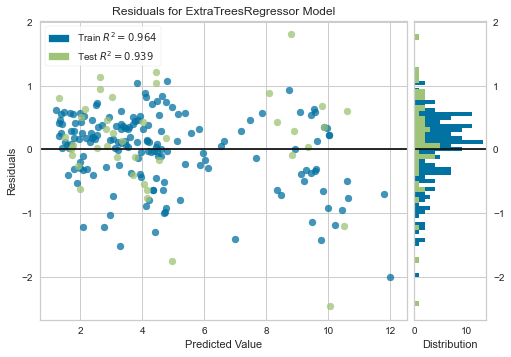

In [37]:
plot_model(tune_et)

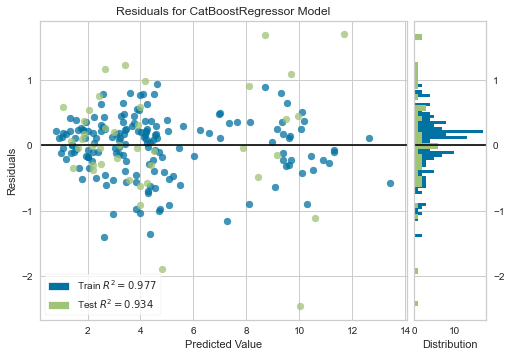

In [38]:
tune_catboost= tune_model(catboost,n_iter = 15, optimize = "MAE")
plot_model(tune_catboost)

In [59]:
blender = blend_models(estimator_list = [huber,xgboost, tune_et,br])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4626,0.3638,0.6032,0.9363,0.1142,0.1359
1,0.4523,0.2752,0.5246,0.9630,0.1266,0.1541
2,0.8786,1.2599,1.1224,0.8461,0.1660,0.1428
3,0.3064,0.1337,0.3656,0.9790,0.1071,0.1261
4,0.5232,0.3717,0.6096,0.9485,0.1415,0.1983
5,0.4221,0.2498,0.4998,0.9663,0.1062,0.1227
6,0.7168,0.8060,0.8978,0.9207,0.1647,0.1782
7,0.3436,0.1832,0.4281,0.9811,0.1073,0.0929
8,0.6262,0.5550,0.7450,0.9520,0.1496,0.1604
9,0.7742,0.8626,0.9288,0.8431,0.1648,0.1797


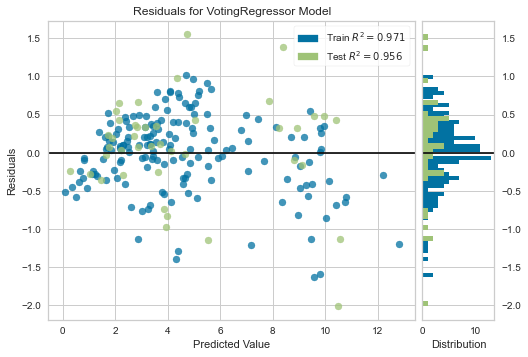

In [60]:
plot_model(blender)

In [61]:
train_pred_et = predict_model(tune_et, data = train_data)

train_pred_huber = predict_model(huber, data = train_data)

train_pred_catboost = predict_model(tune_catboost, data = train_data)

train_pred_br = predict_model(br, data = train_data)

train_pred_blender = predict_model(blender, data = train_data)

train_pred_xgboost = predict_model(xgboost, data = train_data)


In [62]:
test_pred_et = predict_model(tune_et, data = test_data)

test_pred_huber = predict_model(huber, data = test_data)

test_pred_catboost = predict_model(catboost, data = test_data)

test_pred_br = predict_model(br, data = test_data)

test_pred_blender = predict_model(blender, data = test_data)

test_pred_xgboost = predict_model(xgboost, data = test_data)




In [63]:
print(test_pred_et.head())

print(test_pred_huber.head())

     Tmax  Tmin  Rh1    W  EVAP     Label
166  27.5  11.0   90  3.4   4.0  2.970215
167  30.4  13.5   88  5.0   5.0  4.204644
168  32.9  15.5   88  5.3   5.7  4.713592
169  35.7  18.7   77  3.1   6.0  5.938802
170  32.1  17.7   83  5.9   6.0  5.210813
     Tmax  Tmin  Rh1    W  EVAP     Label
166  27.5  11.0   90  3.4   4.0  3.039008
167  30.4  13.5   88  5.0   5.0  4.854203
168  32.9  15.5   88  5.3   5.7  5.883772
169  35.7  18.7   77  3.1   6.0  5.807088
170  32.1  17.7   83  5.9   6.0  5.630486


In [64]:
df_test_et = pd.DataFrame({"actual":test_pred_et ['EVAP'],
                  "et":test_pred_et['Label'], "huber":test_pred_huber['Label'],"catboost":test_pred_catboost['Label'],
                           "br":test_pred_br['Label'],"blender":test_pred_blender['Label'],
                          "xgboost":test_pred_xgboost['Label']})


In [65]:
df_train_et = pd.DataFrame({"actual": train_pred_et['EVAP'],
                  "et":train_pred_et['Label'], "huber":train_pred_huber['Label'], "catboost":train_pred_catboost['Label'], 
                            "br":train_pred_br['Label'],"blender":train_pred_blender['Label'],
                            "xgboost":train_pred_xgboost['Label']})

In [72]:
df_test_et.head()

,actual,et,huber,catboost,br,blender,xgboost
166,4.0,2.970215,3.039008,3.686149,3.052046,3.264509,3.996766
167,5.0,4.204644,4.854203,4.706378,4.843955,4.724466,4.995064
168,5.7,4.713592,5.883772,5.444641,5.803939,5.525264,5.699753
169,6.0,5.938802,5.807088,5.924033,5.997927,5.935913,5.999835
170,6.0,5.210813,5.630486,5.704756,5.731391,5.641934,5.995048


In [73]:
df_test_et.to_csv('test_all_eva.csv')
df_train_et.to_csv('train_all_eva.csv')

In [68]:
# plot_model(en_catboost)

In [69]:
# stack_catboost = stack_models(estimator_list = [huber, et,br,catboost], meta_model = catboost)

In [70]:
# plot_model(stack_catboost)

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Trmse_et = (np.sqrt(mean_squared_error(df_test_et['actual'],df_test_et['et'])))
Tr2_et = r2_score(df_test_et['actual'],df_test_et['et'])
print('Testing performance of et')
print('RMSE: {:.2f}'.format(Trmse_et))
print('R2: {:.2f}'.format(Tr2_et))


Trmse_huber = (np.sqrt(mean_squared_error(df_test_et['actual'],df_test_et['huber'])))
Tr2_huber = r2_score(df_test_et['actual'],df_test_et['huber'])
print('Testing performance of huber')
print('RMSE: {:.2f}'.format(Trmse_huber))
print('R2: {:.2f}'.format(Tr2_huber))


Trmse_catboost = (np.sqrt(mean_squared_error(df_test_et['actual'],df_test_et['catboost'])))
Tr2_catboost = r2_score(df_test_et['actual'],df_test_et['catboost'])
print('Testing performance of catboost')
print('RMSE: {:.2f}'.format(Trmse_catboost))
print('R2: {:.2f}'.format(Tr2_catboost))

Trmse_xgboost = (np.sqrt(mean_squared_error(df_test_et['actual'],df_test_et['xgboost'])))
Tr2_xgboost = r2_score(df_test_et['actual'],df_test_et['xgboost'])
print('Testing performance of xgboost')
print('RMSE: {:.2f}'.format(Trmse_xgboost))
print('R2: {:.2f}'.format(Tr2_xgboost))


Trmse_br = (np.sqrt(mean_squared_error(df_test_et['actual'],df_test_et['br'])))
Tr2_br = r2_score(df_test_et['actual'],df_test_et['br'])
print('Testing performance of br')
print('RMSE: {:.2f}'.format(Trmse_br))
print('R2: {:.2f}'.format(Tr2_br))

Trmse_blender = (np.sqrt(mean_squared_error(df_test_et['actual'],df_test_et['blender'])))
Tr2_blender = r2_score(df_test_et['actual'],df_test_et['blender'])
print('Testing performance of blender')
print('RMSE: {:.2f}'.format(Trmse_blender))
print('R2: {:.2f}'.format(Tr2_blender))

print('-----------------------------------------------------')


rmse_et = (np.sqrt(mean_squared_error(df_train_et['actual'],df_train_et['et'])))
r2_et = r2_score(df_train_et['actual'],df_train_et['et'])
print('Training performance of et')
print('RMSE: {:.2f}'.format(rmse_et))
print('R2: {:.2f}'.format(r2_et))

rmse_catboost = (np.sqrt(mean_squared_error(df_train_et['actual'],df_train_et['catboost'])))
r2_catboost = r2_score(df_train_et['actual'],df_train_et['catboost'])
print('Training performance of catboost')
print('RMSE: {:.2f}'.format(rmse_catboost))
print('R2: {:.2f}'.format(r2_catboost))


rmse_huber = (np.sqrt(mean_squared_error(df_train_et['actual'],df_train_et['huber'])))
r2_huber = r2_score(df_train_et['actual'],df_train_et['huber'])
print('Training performance of huber')
print('RMSE: {:.2f}'.format(rmse_huber))
print('R2: {:.2f}'.format(r2_huber))


rmse_br = (np.sqrt(mean_squared_error(df_train_et['actual'],df_train_et['br'])))
r2_br = r2_score(df_train_et['actual'],df_train_et['br'])
print('Training performance of br')
print('RMSE: {:.2f}'.format(rmse_br))
print('R2: {:.2f}'.format(r2_br))

rmse_blender = (np.sqrt(mean_squared_error(df_train_et['actual'],df_train_et['blender'])))
r2_blender = r2_score(df_train_et['actual'],df_train_et['blender'])
print('Training performance ofblender')
print('RMSE: {:.2f}'.format(rmse_blender))
print('R2: {:.2f}'.format(r2_blender))

rmse_xgboost = (np.sqrt(mean_squared_error(df_train_et['actual'],df_train_et['xgboost'])))
r2_xgboost = r2_score(df_train_et['actual'],df_train_et['xgboost'])
print('Training performance of xgboost')
print('RMSE: {:.2f}'.format(rmse_xgboost))
print('R2: {:.2f}'.format(r2_xgboost))



Testing performance of et
RMSE: 0.85
R2: 0.94
Testing performance of huber
RMSE: 1.06
R2: 0.90
Testing performance of catboost
RMSE: 0.51
R2: 0.98
Testing performance of xgboost
RMSE: 0.59
R2: 0.97
Testing performance of br
RMSE: 1.02
R2: 0.91
Testing performance of blender
RMSE: 0.77
R2: 0.95
-----------------------------------------------------
Training performance of et
RMSE: 0.54
R2: 0.96
Training performance of catboost
RMSE: 0.49
R2: 0.97
Training performance of huber
RMSE: 0.69
R2: 0.94
Training performance of br
RMSE: 0.71
R2: 0.94
Training performance ofblender
RMSE: 0.46
R2: 0.97
Training performance of xgboost
RMSE: 0.33
R2: 0.99


In [ ]:
# evaluate_model(catboost)

In [ ]:
predict_model(catboost)